In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [4]:
mnist_data = pd.read_csv('datasets/mnist.csv')

mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_data.shape

(10000, 785)

In [9]:
mnist_data['label'].nunique()

10

In [11]:
mnist_features = mnist_data[mnist_data.columns[1:]]

mnist_label = mnist_data['label']

In [16]:
def display_image(index):
    print('Digit: ', mnist_label[index])
    
    plt.imshow(mnist_features.loc[index].values.reshape(28, 28), cmap='Greys')

Digit:  1


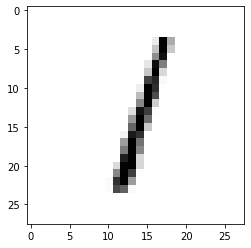

In [17]:
display_image(2)

Digit:  7


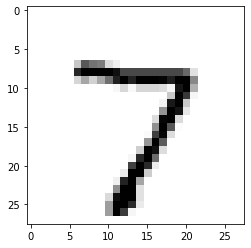

In [18]:
display_image(0)

In [19]:
mnist_features = np.asarray(mnist_features)

mnist_features.shape

(10000, 784)

In [20]:
mnist_features[10][150:200]

array([179, 245, 236, 242, 254, 254, 254, 254, 245, 235,  84,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 151, 254, 254, 254, 213, 192, 178, 178, 180, 254, 254, 241,
        46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [21]:
mnist_features = mnist_features /255

In [22]:
mnist_features[10][150:200]

array([0.70196078, 0.96078431, 0.9254902 , 0.94901961, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.96078431, 0.92156863,
       0.32941176, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59215686, 0.99607843, 0.99607843,
       0.99607843, 0.83529412, 0.75294118, 0.69803922, 0.69803922,
       0.70588235, 0.99607843, 0.99607843, 0.94509804, 0.18039216,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(mnist_features, mnist_label, test_size = 0.2, shuffle = True)

In [26]:
logistic = linear_model.LogisticRegression(solver ='lbfgs', max_iter = 1000, multi_class = 'multinomial')

In [28]:
param_grid = {'C' : [0.1, 1, 5]}

grid_search = GridSearchCV(logistic, param_grid, cv = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1}